In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.optimizers import legacy
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical

In [2]:
img_size = [224, 224]

In [3]:
train_path = '/Users/umabisht/Desktop/PProject/Machine Learning/LungDisease/trainData'
test_path = '/Users/umabisht/Desktop/PProject/Machine Learning/LungDisease/testData'


In [4]:
num_classes = 3

vgg = VGG16(input_shape=img_size + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False
    

x = Flatten()(vgg.output)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=predictions)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



# Data Augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  
    shuffle=True
)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  
    shuffle=False
)

Found 9003 images belonging to 3 classes.
Found 6000 images belonging to 3 classes.


In [5]:

train_labels = to_categorical(train_set.classes, num_classes=num_classes)
test_labels = to_categorical(test_set.classes, num_classes=num_classes)

checkpoint = ModelCheckpoint(filepath="best_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')


model_history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=5,
    validation_steps=32,
    verbose=2,
    callbacks=[checkpoint] 
)


print("Model training completed.")



Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.61719, saving model to best_model.h5
5/5 - 269s - loss: 6.9023 - accuracy: 0.5000 - val_loss: 4.2096 - val_accuracy: 0.6172 - 269s/epoch - 54s/step


/Users/umabisht/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10

Epoch 2: val_accuracy improved from 0.61719 to 0.90430, saving model to best_model.h5
5/5 - 255s - loss: 2.7630 - accuracy: 0.8062 - val_loss: 1.0376 - val_accuracy: 0.9043 - 255s/epoch - 51s/step
Epoch 3/10

Epoch 3: val_accuracy improved from 0.90430 to 0.93555, saving model to best_model.h5
5/5 - 273s - loss: 1.8372 - accuracy: 0.8625 - val_loss: 0.9039 - val_accuracy: 0.9355 - 273s/epoch - 55s/step
Epoch 4/10

Epoch 4: val_accuracy did not improve from 0.93555
5/5 - 273s - loss: 1.8289 - accuracy: 0.8875 - val_loss: 1.6771 - val_accuracy: 0.8965 - 273s/epoch - 55s/step
Epoch 5/10

Epoch 5: val_accuracy did not improve from 0.93555
5/5 - 272s - loss: 2.3213 - accuracy: 0.8750 - val_loss: 1.2384 - val_accuracy: 0.9277 - 272s/epoch - 54s/step
Epoch 6/10

Epoch 6: val_accuracy improved from 0.93555 to 0.98633, saving model to best_model.h5
5/5 - 281s - loss: 1.3829 - accuracy: 0.9187 - val_loss: 0.1781 - val_accuracy: 0.9863 - 281s/epoch - 56s/step
Epoch 7/10

Epoch 7: val_

In [1]:
# try:
#     # Evaluate model
#     loss, accuracy = model.evaluate(test_set, verbose=0)
#     print("Test Accuracy: {:.2f}%".format(accuracy * 100))
# except Exception as e:
#     print("An error occurred during evaluation:", str(e))


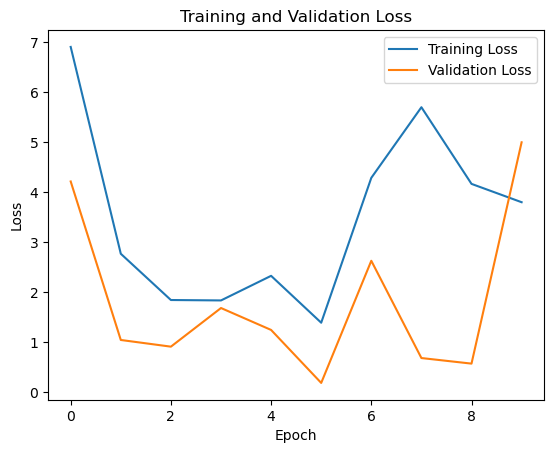

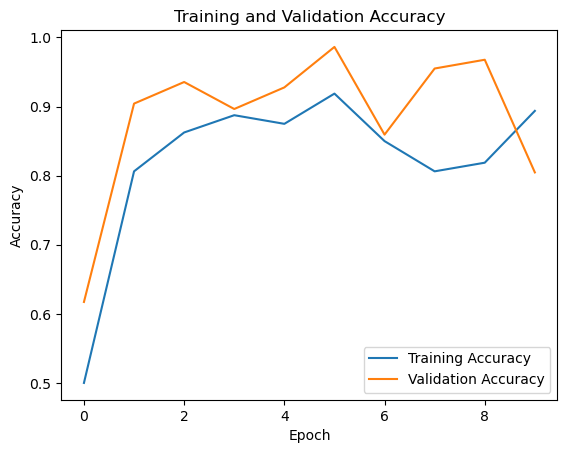

In [6]:

# Plot training history
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [7]:



# y_pred_prob = model.predict(test_set)

# y_pred = np.argmax(y_pred_prob, axis=1)


# y_true = test_set.classes

# conf_matrix = confusion_matrix(y_true, y_pred)

# class_report = classification_report(y_true, y_pred)

# print("Confusion Matrix:")
# print(conf_matrix)
# print("\nClassification Report:")
# print(class_report)

188/188 [==============================] - 1241s 7s/step
Confusion Matrix:
[[1598   65  337]
 [   2 1998    0]
 [  70    4 1926]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      2000
           1       0.97      1.00      0.98      2000
           2       0.85      0.96      0.90      2000

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



### 


In [ ]:
# def predict_image_class(image_path):
#     # Load the image
#     img = keras_image.load_img(image_path, target_size=(224, 224))
#     # Convert image to array
#     img_array = keras_image.img_to_array(img)
#     # Expand dimensions to match model input shape
#     img_array = np.expand_dims(img_array, axis=0)
#     # Preprocess the input image
#     processed_img = preprocess_input(img_array)
#     # Load the trained model
#     model = load_model("best_model.h5")  # Load the best model saved during training
#     # Predict the class probabilities
#     predictions = model.predict(processed_img)
#     # Get the predicted class label
#     predicted_class = np.argmax(predictions)
#     return predicted_class

# # Example usage
# image_path = "/path/to/your/image.jpg"
# predicted_class = predict_image_class(image_path)
# print("Predicted class:", folders[predicted_class])

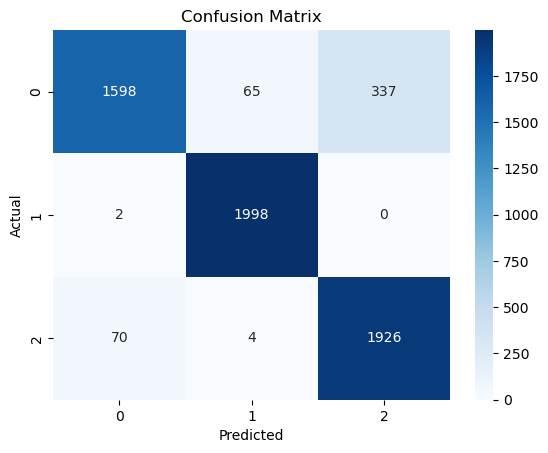

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      2000
           1       0.97      1.00      0.98      2000
           2       0.85      0.96      0.90      2000

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt 


conf_matrix = confusion_matrix(y_true, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)


In [10]:
precision_class_0 = 0.87
precision_class_1 = 0.98
precision_class_2 = 0.90

support_class_0 = 2000
support_class_1 = 2000
support_class_2 = 2000

total_support = support_class_0 + support_class_1 + support_class_2

combined_precision = (precision_class_0 * support_class_0 +
                      precision_class_1 * support_class_1 +
                      precision_class_2 * support_class_2) / total_support

print("Combined Precision: {:.2f}%".format(combined_precision * 100))


Combined Precision: 91.67%


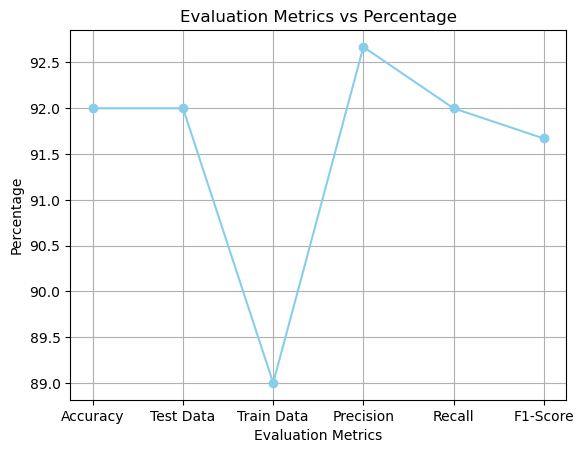

In [16]:
import matplotlib.pyplot as plt

# Evaluation metrics and their corresponding values
evaluation_metrics = ['Accuracy', 'Test Data', 'Train Data', 'Precision', 'Recall', 'F1-Score']
values = [92, 92, 89, 92.67, 92, 91.67]  # Example values for demonstration

plt.plot(evaluation_metrics, values, marker='o', color='skyblue', linestyle='-')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Percentage')
plt.title('Evaluation Metrics vs Percentage')
plt.grid(True)
plt.show()


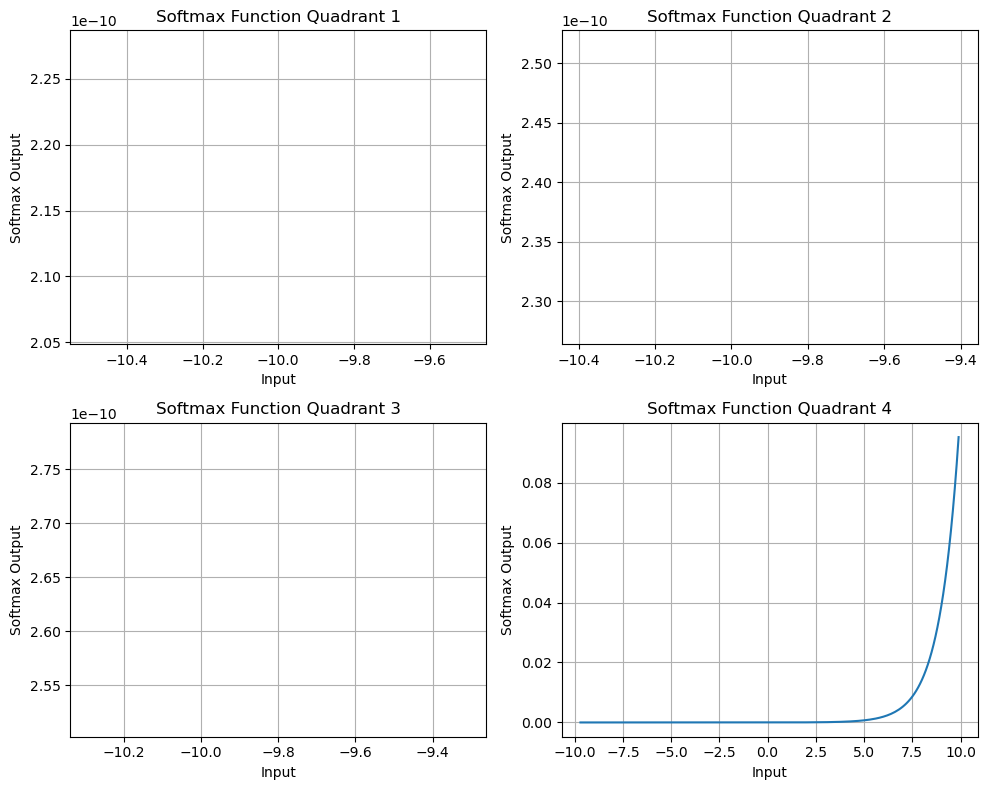

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Softmax function definition
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

# Define input values
x_values = np.arange(-10, 10, 0.1)

# Calculate softmax values for input range
softmax_values = softmax(x_values)

# Create subplots for each quadrant
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot softmax function for each quadrant
for i in range(2):
    for j in range(2):
        start_index = i * 2 + j
        end_index = start_index + 1 if start_index < 3 else len(x_values)
        axs[i, j].plot(x_values[start_index:end_index], softmax_values[start_index:end_index])
        axs[i, j].set_xlabel('Input')
        axs[i, j].set_ylabel('Softmax Output')
        axs[i, j].set_title(f'Softmax Function Quadrant {i * 2 + j + 1}')
        axs[i, j].grid(True)

plt.tight_layout()
plt.show()


In [23]:
from keras.preprocessing import image as keras_image
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.optimizers import legacy
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical
from keras.models import load_model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings

from keras.preprocessing import image as keras_image
import numpy as np
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model

def predict_image_class(image_path, model_path, class_folders):
    
    img = keras_image.load_img(image_path, target_size=(224, 224))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
   
    processed_img = preprocess_input(img_array)
    
    model = load_model(model_path) 
    predictions = model.predict(processed_img)
   
    predicted_class = np.argmax(predictions)
    return class_folders[predicted_class]


image_path = "/Users/umabisht/Desktop/PProject/Machine Learning/LungDisease/testData/lung_scc/lungscc2973.jpeg"
model_path = "best_model.h5"
class_folders = ['lung_aca', 'lung_n', 'lung_scc']  
predicted_class = predict_image_class(image_path, model_path, class_folders)
print("Predicted class:", predicted_class)


1/1 [==============================] - 1s 559ms/step
Predicted class: lung_scc
